<a href="https://colab.research.google.com/github/prbocca/meli_ds/blob/main/meli_ds_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science challenge 

El desafío consta de 5 ejercicios independientes que van desde análisis exploratorio, machine learning o el diseño de una solución de data science.

¿Qué evaluamos?
El desafío busca evaluar distintos aspectos como:
* Capacidad analitica y exploración de datos
* Visualización de resultados
* Conocimientos de técnicas de generación de features y modelado
* Análisis de performance
* Buenas prácticas de desarrollo
* Diseño e implementación de Machine learning en producción

Algunas reglas y recomendaciones:
1. Si bien son 5 ejercicios dejamos a elección del postulante cuales resolver salvo
por el primero que es obligatorio como parte del desafío.
2. Un número recomendado a resolver son 3 de los 5 desafíos, pero sentite libre
de resolver la cantidad deseada.
3. La mayoría de los ejercicios se piden resolver en Jupyter notebooks y te
recomendamos subirlas a un repositorio de GitHub público para compartir los
resultados.
4. No dejes de hacernos preguntas sobre cualquier duda con los enunciados

El desafío se analiza de acuerdo al seniority del postulante y teniendo en cuenta también las necesidades particulares de la posición.

# 1. Explorar las ofertas relámpago, ¿qué insights puedes generar?

## Descripción
En conjunto con el desafío te compartimos un archivo llamado `ofertas_relampago.csv` el cual posee información de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado.

Estas ofertas en mercadolibre se pueden ver de la siguiente manera:
image.png


Es decir, son ofertas que tienen una duración definida de algunas horas y un
porcentaje de unidades (stock) comprometidas.
El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights
sobre este tipo de ofertas.
Las columnas del dataset son autoexplicativas pero puedes preguntarnos cualquier
duda.

## Entregable

El entregable de este desafío es una Jupyter notebook con el EDA.

## Preguntas

* Es falso que todos los NaN en SOLD_QUANTITY corresponden a cero ventas. ¿a que se deben?

* SOLD_AMOUNT	es en plata, y SOLD_AMOUNT/SOLD_QUANTITY es precio unitario

* ORIGIN que es? A o null...

* no conocemos el item.. los agrupamientos son: ¿ DOMAIN_ID in DOM_DOMAIN_AGG1 in	VERTICAL ?

In [ ]:
# installs

!pip install plotly
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# liberias

from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import random
import os
import shutil
import gc
import bz2
import pickle
import _pickle as cPickle
import numpy as np
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import time 
from datetime import datetime, timedelta

import lightgbm as lgb
#import dask_xgboost as xgb
import dask.dataframe as dd
import sklearn as sk
#from sklearn import preprocessing, metrics
#from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit

from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display
from tqdm import tnrange, tqdm_notebook

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

tf.random.set_seed(13) #Setting seed to ensure reproducibility.

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# funciones auxiliares

In [ ]:
# configuración

data_filename = 'https://raw.githubusercontent.com/prbocca/meli_ds/main/data/ofertas_relampago.csv'

# Load & preprocessing data

In [ ]:
raw_df = pd.read_csv(data_filename, sep=",", engine='python')

#tranformo a datetime
raw_df['OFFER_START_DATE'] = pd.to_datetime(raw_df['OFFER_START_DATE']) 
raw_df['OFFER_START_DTTM'] = pd.to_datetime(raw_df['OFFER_START_DTTM']) 
raw_df['OFFER_FINISH_DTTM'] = pd.to_datetime(raw_df['OFFER_FINISH_DTTM']) 

#Elimino columnas sin información
print('OFFER_TYPE siempre es: '+ str(raw_df['OFFER_TYPE'].value_counts()) + '\n')
raw_df.drop(columns=['OFFER_TYPE'], inplace=True)

display(raw_df.info())
display(raw_df)

OFFER_TYPE siempre es: lightning_deal    48746
Name: OFFER_TYPE, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   INVOLVED_STOCK             48746 non-null  int64              
 4   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 5   SOLD_AMOUNT                24579 non-null  float64            
 6   SOLD_QUANTITY              24579 non-null  float64            
 7   ORIGIN                     11316 non-null  object             
 8   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 9   DOM_DOMAIN_AGG1            48746 non-null  object          

None

OFFER_START_DATE          OFFER_START_DTTM         OFFER_FINISH_DTTM  \
0           2021-06-22 2021-06-22 16:00:00+00:00 2021-06-22 23:02:43+00:00   
1           2021-06-22 2021-06-22 13:00:00+00:00 2021-06-22 19:00:02+00:00   
2           2021-06-22 2021-06-22 07:00:00+00:00 2021-06-22 13:00:01+00:00   
3           2021-06-22 2021-06-22 19:00:00+00:00 2021-06-23 01:36:12+00:00   
4           2021-06-22 2021-06-22 13:00:00+00:00 2021-06-22 15:48:12+00:00   
...                ...                       ...                       ...   
48741       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 19:00:01+00:00   
48742       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 19:00:01+00:00   
48743       2021-06-19 2021-06-19 07:00:00+00:00 2021-06-19 13:00:03+00:00   
48744       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 19:00:00+00:00   
48745       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 19:00:00+00:00   

       INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  SOLD_QUANTITY  \
0                   4                         -2         4.72            6.0   
1                   5                          5          NaN            NaN   
2                  15                         12        10.73            3.0   
3                  15                         13         7.03            2.0   
4                  15                          0        39.65           15.0   
...               ...                        ...          ...            ...   
48741              15                          9        16.28            6.0   
48742               5                          5          NaN            NaN   
48743               5                          3        16.62            2.0   
48744               5                          1        38.79            4.0   
48745              15                         15          NaN            NaN   

      ORIGIN SHIPPING_PAYMENT_TYPE DOM_DOMAIN_AGG1         VERTICAL  \
0          A                  none       PETS FOOD              CPG   
1        NaN         free_shipping    PET PRODUCTS           OTHERS   
2        NaN                  none       COMPUTERS               CE   
3        NaN                  none       COMPUTERS               CE   
4        NaN                  none       COMPUTERS               CE   
...      ...                   ...             ...              ...   
48741    NaN                  none      HOME&DECOR  HOME & INDUSTRY   
48742    NaN         free_shipping      HOME&DECOR  HOME & INDUSTRY   
48743    NaN         free_shipping      HOME&DECOR  HOME & INDUSTRY   
48744    NaN         free_shipping      HOME&DECOR  HOME & INDUSTRY   
48745    NaN         free_shipping      HOME&DECOR  HOME & INDUSTRY   

                            DOMAIN_ID  
0                      MLM-BIRD_FOODS  
1         MLM-ANIMAL_AND_PET_PRODUCTS  
2                        MLM-SPEAKERS  
3                      MLM-HEADPHONES  
4                      MLM-HEADPHONES  
...                               ...  
48741            MLM-CHRISTMAS_LIGHTS  
48742        MLM-DECORATIVE_PAINTINGS  
48743  MLM-INDOOR_CURTAINS_AND_BLINDS  
48744  MLM-INDOOR_CURTAINS_AND_BLINDS  
48745                  MLM-BED_SHEETS  

[48746 rows x 12 columns]

In [ ]:
# No esta muy claro que es el origen? A = argentina, y el resto nulls?

print(raw_df['ORIGIN'].value_counts())
#raw_df.drop(columns=['OFFER_TYPE'], inplace=True)

A    11316
Name: ORIGIN, dtype: int64


In [ ]:
# Los nulos en SOLD_QUANTITY y SOLD_AMOUNT coinciden

null_solds1 = raw_df['SOLD_QUANTITY'].isnull()
null_solds2 = raw_df['SOLD_AMOUNT'].isnull()
print((null_solds1 == null_solds2).value_counts())

True    48746
dtype: int64


In [ ]:
# Es falso que todos los NaN en SOLD_QUANTITY corresponden a cero ventas

sold_count = raw_df['INVOLVED_STOCK'] - raw_df['REMAINING_STOCK_AFTER_END']

zero_solds1 = raw_df['SOLD_QUANTITY'].isnull()
zero_solds2 = (sold_count == 0)
print((zero_solds1 == zero_solds2).value_counts())

True     47945
False      801
dtype: int64


Agrego algunas columnas que pueden ser interesantes

In [ ]:
# contar las ofertas relampagos
raw_df['count'] = 1

In [ ]:
# duración de la oferta
raw_df['OFFER_PERIOD_MINS'] = (raw_df['OFFER_FINISH_DTTM'] - raw_df['OFFER_START_DTTM']).dt.seconds/60

raw_df['OFFER_PERIOD_MINS_ROUND'] = (raw_df['OFFER_PERIOD_MINS'] / 100).astype(int) *100 #redondeo para visualizar

In [ ]:
# precio unitario
raw_df['SOLD_PRICE'] = raw_df['SOLD_AMOUNT']/raw_df['SOLD_QUANTITY']

In [ ]:
print('Periodo de estudio: ' + str(raw_df['OFFER_START_DTTM'].min()) + ' - ' + str(raw_df['OFFER_START_DTTM'].max()))
# son 2 meses de datos

Periodo de estudio: 2021-06-01 07:00:00+00:00 - 2021-07-31 19:00:00+00:00


In [ ]:
def busday(x, **params):
  '''
  working days from the beggining of month until x (included)
  @x datetime
  acepta como parametro holidays ver https://numpy.org/doc/stable/reference/generated/numpy.busday_count.html
  '''
  first_date_of_month = x.replace(day = 1, hour=0, minute=0, second=0, microsecond=0)
  last_date = x + timedelta(days=1)
  d = np.busday_count(first_date_of_month.strftime('%Y-%m-%d'), last_date.strftime('%Y-%m-%d'), **params) 
  return(d)
  
# time-coded features
raw_df['year']      = raw_df['OFFER_START_DTTM'].dt.year  
raw_df['month']     = raw_df['OFFER_START_DTTM'].dt.month    
raw_df['week']      = raw_df['OFFER_START_DTTM'].dt.week
raw_df['day']       = raw_df['OFFER_START_DTTM'].dt.day
raw_df['hour']      = raw_df['OFFER_START_DTTM'].dt.hour
raw_df['weekday']   = raw_df['OFFER_START_DTTM'].dt.weekday  
raw_df['weekday_name'] = raw_df['weekday'].map({0:'Monday',1:'Tuesday', 2:'Wednesday',3:'Thursday', 4:'Friday', 5:'Saturday',6:'Sunday'})
raw_df['workday'] = (raw_df['OFFER_START_DTTM'].dt.weekday<5).astype(int) #True/False if Monday-Friday/weekend
raw_df['busday'] = [busday(x, holidays=[]) for x in raw_df['OFFER_START_DTTM']] #laborales desde ppio de mes

In [ ]:
raw_df[['OFFER_START_DATE','busday','workday']]

OFFER_START_DATE  busday  workday
0           2021-06-22      16        1
1           2021-06-22      16        1
2           2021-06-22      16        1
3           2021-06-22      16        1
4           2021-06-22      16        1
...                ...     ...      ...
48741       2021-06-19      14        0
48742       2021-06-19      14        0
48743       2021-06-19      14        0
48744       2021-06-19      14        0
48745       2021-06-19      14        0

[48746 rows x 3 columns]

In [ ]:
display(raw_df.info())
display(raw_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   INVOLVED_STOCK             48746 non-null  int64              
 4   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 5   SOLD_AMOUNT                24579 non-null  float64            
 6   SOLD_QUANTITY              24579 non-null  float64            
 7   ORIGIN                     11316 non-null  object             
 8   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 9   DOM_DOMAIN_AGG1            48746 non-null  object             
 10  VERTICAL                   48746 non-null  object             
 11  DO

None

OFFER_START_DATE          OFFER_START_DTTM         OFFER_FINISH_DTTM  \
0           2021-06-22 2021-06-22 16:00:00+00:00 2021-06-22 23:02:43+00:00   
1           2021-06-22 2021-06-22 13:00:00+00:00 2021-06-22 19:00:02+00:00   
2           2021-06-22 2021-06-22 07:00:00+00:00 2021-06-22 13:00:01+00:00   
3           2021-06-22 2021-06-22 19:00:00+00:00 2021-06-23 01:36:12+00:00   
4           2021-06-22 2021-06-22 13:00:00+00:00 2021-06-22 15:48:12+00:00   
...                ...                       ...                       ...   
48741       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 19:00:01+00:00   
48742       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 19:00:01+00:00   
48743       2021-06-19 2021-06-19 07:00:00+00:00 2021-06-19 13:00:03+00:00   
48744       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 19:00:00+00:00   
48745       2021-06-19 2021-06-19 13:00:00+00:00 2021-06-19 19:00:00+00:00   

       INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  SOLD_QUANTITY  \
0                   4                         -2         4.72            6.0   
1                   5                          5          NaN            NaN   
2                  15                         12        10.73            3.0   
3                  15                         13         7.03            2.0   
4                  15                          0        39.65           15.0   
...               ...                        ...          ...            ...   
48741              15                          9        16.28            6.0   
48742               5                          5          NaN            NaN   
48743               5                          3        16.62            2.0   
48744               5                          1        38.79            4.0   
48745              15                         15          NaN            NaN   

      ORIGIN SHIPPING_PAYMENT_TYPE DOM_DOMAIN_AGG1  ... SOLD_PRICE  year  \
0          A                  none       PETS FOOD  ...   0.786667  2021   
1        NaN         free_shipping    PET PRODUCTS  ...        NaN  2021   
2        NaN                  none       COMPUTERS  ...   3.576667  2021   
3        NaN                  none       COMPUTERS  ...   3.515000  2021   
4        NaN                  none       COMPUTERS  ...   2.643333  2021   
...      ...                   ...             ...  ...        ...   ...   
48741    NaN                  none      HOME&DECOR  ...   2.713333  2021   
48742    NaN         free_shipping      HOME&DECOR  ...        NaN  2021   
48743    NaN         free_shipping      HOME&DECOR  ...   8.310000  2021   
48744    NaN         free_shipping      HOME&DECOR  ...   9.697500  2021   
48745    NaN         free_shipping      HOME&DECOR  ...        NaN  2021   

       month  week  day  hour  weekday  weekday_name  workday  busday  
0          6    25   22    16        1       Tuesday        1      16  
1          6    25   22    13        1       Tuesday        1      16  
2          6    25   22     7        1       Tuesday        1      16  
3          6    25   22    19        1       Tuesday        1      16  
4          6    25   22    13        1       Tuesday        1      16  
...      ...   ...  ...   ...      ...           ...      ...     ...  
48741      6    24   19    13        5      Saturday        0      14  
48742      6    24   19    13        5      Saturday        0      14  
48743      6    24   19     7        5      Saturday        0      14  
48744      6    24   19    13        5      Saturday        0      14  
48745      6    24   19    13        5      Saturday        0      14  

[48746 rows x 25 columns]

# Visual inspect

Podemos ver los datos en nube de puntos según distintas variables. Lo más util es cambiar el eje `x` buscando patrones en los datos

In [ ]:
def plot_scatter(size,color, y, x):
  raw_filter_df = raw_df[[x,y,size, color]].dropna()

  fig = px.scatter(raw_filter_df, x=x, y=y, color=color,size=size, size_max=25)
  fig.update_layout(#title= 'Scatter of Flash offers', 
                    width=1000, height=600, autosize=False)
  fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
  fig.show()


p=interactive(plot_scatter, 
              size = widgets.Select(options=sorted(raw_df.columns.tolist()),
                                            value="SOLD_QUANTITY", rows=10, description='size'),
              color = widgets.Select(options=sorted(raw_df.columns.tolist()),
                                            value="VERTICAL", rows=10, description='color'),
              y = widgets.Select(options=sorted(raw_df.columns.tolist()),
                                            value="SOLD_AMOUNT", rows=10, description='y'),              
              x = widgets.Select(options=sorted(raw_df.columns.tolist()),
                                            value="OFFER_PERIOD_MINS", rows=10, description='x'),
              )
display(p)

interactive(children=(Select(description='size', index=13, options=('DOMAIN_ID', 'DOM_DOMAIN_AGG1', 'INVOLVED_…

## Domains and verticals



In [ ]:
print('Cantidad de verticales: ' + str(len(raw_df['VERTICAL'].unique())))
print('Cantidad de dominios agg1: ' + str(len(raw_df['DOM_DOMAIN_AGG1'].unique())))
print('Cantidad de identificadores de dominio: ' + str(len(raw_df['DOMAIN_ID'].unique())))

Cantidad de verticales: 9
Cantidad de dominios agg1: 36
Cantidad de identificadores de dominio: 1266


In [ ]:
group = raw_df.groupby(['VERTICAL','DOM_DOMAIN_AGG1'],as_index=False)['count'].sum().dropna()
group['MELI'] = 'MELI'
#group.rename(columns={'state_id':'State','store_name':'Store','item_id':'Count'},inplace=True)
group.loc[(group['count'] ==0), 'count'] = 0.01
fig = px.treemap(group, path=['MELI', 'VERTICAL', 'DOM_DOMAIN_AGG1'], values='count',
                  color='count',
                  color_continuous_scale= px.colors.sequential.Sunset,
                  title='Number of flash offers')
fig.update_layout(template='seaborn',
                  autosize=False, width=1200, height=600)
fig.show(renderer="colab")

In [ ]:
group = raw_df.groupby(['VERTICAL','DOM_DOMAIN_AGG1'],as_index=False)['SOLD_QUANTITY'].sum().dropna()
group['MELI'] = 'MELI'
#group.rename(columns={'state_id':'State','store_name':'Store','item_id':'Count'},inplace=True)
group.loc[(group['SOLD_QUANTITY'] ==0), 'SOLD_QUANTITY'] = 0.01
fig = px.treemap(group, path=['MELI', 'VERTICAL', 'DOM_DOMAIN_AGG1'], values='SOLD_QUANTITY',
                  color='SOLD_QUANTITY',
                  color_continuous_scale= px.colors.sequential.Sunset,
                  title='Distribution of sold quantities')
fig.update_layout(template='seaborn',
                  autosize=False, width=1200, height=600)
fig.show(renderer="colab")

In [ ]:
group = raw_df.groupby(['VERTICAL','DOM_DOMAIN_AGG1'],as_index=False)['SOLD_AMOUNT'].sum().dropna()
group['MELI'] = 'MELI'
#group.rename(columns={'state_id':'State','store_name':'Store','item_id':'Count'},inplace=True)
group.loc[(group['SOLD_AMOUNT'] ==0), 'SOLD_AMOUNT'] = 0.01
fig = px.treemap(group, path=['MELI', 'VERTICAL', 'DOM_DOMAIN_AGG1'], values='SOLD_AMOUNT',
                  color='SOLD_AMOUNT',
                  color_continuous_scale= px.colors.sequential.Sunset,
                  title='Distribution of sold amounts')
fig.update_layout(template='seaborn',
                  autosize=False, width=1200, height=600)
fig.show(renderer="colab")

In [ ]:
group = raw_df.groupby(['VERTICAL','DOM_DOMAIN_AGG1','DOMAIN_ID'],as_index=False)['SOLD_AMOUNT'].sum().dropna()
group['MELI'] = 'MELI'
#group.rename(columns={'state_id':'State','store_name':'Store','item_id':'Count'},inplace=True)
group.loc[(group['SOLD_AMOUNT'] ==0), 'SOLD_AMOUNT'] = 0.01
fig = px.treemap(group, path=['MELI', 'VERTICAL', 'DOM_DOMAIN_AGG1','DOMAIN_ID'], values='SOLD_AMOUNT',
                  color='SOLD_AMOUNT',
                  color_continuous_scale= px.colors.sequential.Sunset,
                  title='Distribution of sold amounts')
fig.update_layout(template='seaborn',
                  autosize=False, width=1200, height=600)
fig.show(renderer="colab")

## Impact of time period

In [ ]:
fig = px.histogram(raw_df, x='OFFER_PERIOD_MINS', nbins=10, color='VERTICAL', barmode='stack', histfunc='count')
fig.update_xaxes(title_text='Offer period (mins)')
fig.update_yaxes(title_text='number of offers per offer periods')
fig.update_layout(template='seaborn',title='Distribution of number of offers wrt offer periods',
                 legend_title_text='Vertical')
fig.show(renderer="colab")


fig = px.histogram(raw_df, x='OFFER_PERIOD_MINS', y='SOLD_QUANTITY', nbins=10, color='VERTICAL', barmode='stack', histfunc='sum')
fig.update_xaxes(title_text='Offer period (mins)')
fig.update_yaxes(title_text='items sold per offer periods')
fig.update_layout(template='seaborn',title='Distribution of items sold wrt offer periods',
                 legend_title_text='Vertical')
fig.show(renderer="colab")

fig = px.histogram(raw_df, x='OFFER_PERIOD_MINS', y='SOLD_AMOUNT', nbins=10, color='VERTICAL', barmode='stack', histfunc='sum')
fig.update_xaxes(title_text='Offer period (mins)')
fig.update_yaxes(title_text='sold amount ($) per offer periods')
fig.update_layout(template='seaborn',title='Distribution of solds ($) wrt offer periods',
                 legend_title_text='Vertical')
fig.show(renderer="colab")



In [ ]:
aux = raw_df.groupby(['VERTICAL', 'OFFER_PERIOD_MINS_ROUND'], as_index=False)['count'].sum()
fig = px.bar(aux, x="OFFER_PERIOD_MINS_ROUND", y='count', color="VERTICAL", text="count")
fig.update_xaxes(title_text='Offer period (mins)')
fig.update_yaxes(title_text='number of offers per offer periods')
fig.update_layout(template='seaborn',title='Distribution of number of offers wrt offer periods',
                 legend_title_text='Vertical')
fig.show(renderer="colab")

aux = raw_df.groupby(['VERTICAL', 'OFFER_PERIOD_MINS_ROUND'], as_index=False)['SOLD_QUANTITY'].sum()
fig = px.bar(aux, x='OFFER_PERIOD_MINS_ROUND', y='SOLD_QUANTITY',color='VERTICAL', text="SOLD_QUANTITY")
fig.update_xaxes(title_text='Offer period (mins)')
fig.update_yaxes(title_text='items sold per offer periods')
fig.update_layout(template='seaborn',title='Distribution of items sold wrt offer periods',
                 legend_title_text='Vertical')
fig.show(renderer="colab")

aux = raw_df.groupby(['VERTICAL', 'OFFER_PERIOD_MINS_ROUND'], as_index=False)['SOLD_AMOUNT'].sum()
fig = px.bar(aux, x='OFFER_PERIOD_MINS_ROUND', y='SOLD_AMOUNT', color='VERTICAL', text="SOLD_AMOUNT")
fig.update_xaxes(title_text='Offer period (mins)')
fig.update_yaxes(title_text='sold amount ($) per offer periods')
fig.update_layout(template='seaborn',title='Distribution of solds ($) wrt offer periods',
                 legend_title_text='Vertical')
fig.show(renderer="colab")

## Impact of price in sales

## Time frequencies

'VERTICAL','DOM_DOMAIN_AGG1','DOMAIN_ID'],as_index=False)['SOLD_AMOUNT'

In [ ]:
group_data = raw_df.groupby(['hour','weekday','weekday_name','VERTICAL'], as_index=False)['SOLD_AMOUNT'].sum().dropna()

verticals = group_data.VERTICAL.unique().tolist()

fig = make_subplots(rows=len(verticals),cols=1,shared_xaxes=True,vertical_spacing=0.005)
r=1
for v in verticals:
    data = group_data[group_data['VERTICAL']==v]
    data.sort_values(['weekday'], ascending=False, inplace=True)
    fig.add_trace(go.Heatmap(
        z=data['SOLD_AMOUNT'],
        x=data.hour,
        y=data.weekday_name,
        #hovertext=data.date.dt.date,
        coloraxis = "coloraxis",name=v,
    ),r,1)
    fig.update_yaxes(title_text=v,tickfont=dict(size=10), row = r,col = 1)
    r+=1
fig.update_xaxes(range=[1,24],tickfont=dict(size=10), nticks=24)
fig.update_layout(coloraxis = {'colorscale':'magma'})
fig.update_layout(template='seaborn', 
                  title= 'Total sales per starting day and hour',
                  width=1200, height=1000,
                  autosize=False, #height=600
                    )
fig.show(renderer="colab")


# Algunas conclusiones sobre los datos

Este resumen de análisis se encuentra enfocado en los ingresos obtenidos por las ofertas. Se evalua dichos ingresos según la vertical (o dominio) de la oferta, la duración, el precio, y otros factores temporales.

Aquí se pega imagenes de la evidencia (calculada antes) o se hace alguna cuenta que explica.

1. Las ofertas se encuentran bastante distribuidas entre verticales (el dominio con más ofertas es Home&Decor)

newplot (1).png



2. Sin embargo las cantidades vendidas son sorprendetemente altas en PHARMACEUTICS

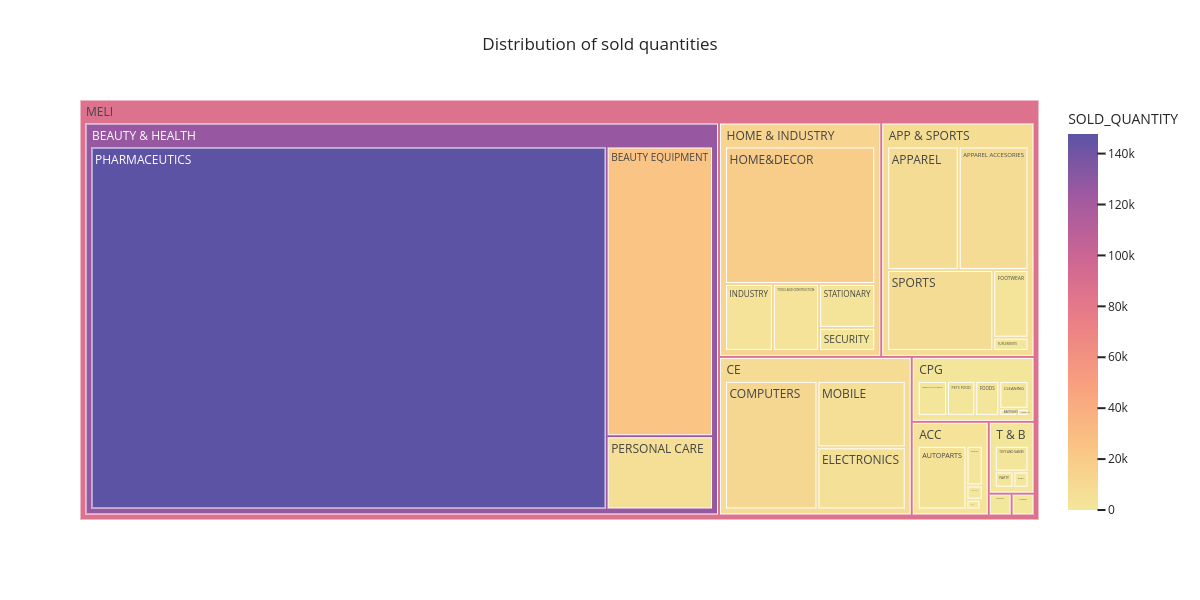

3. Si observamos los ingresos por vertical, la electrónica se acerca a la belleza y salud (que sigue liderando)

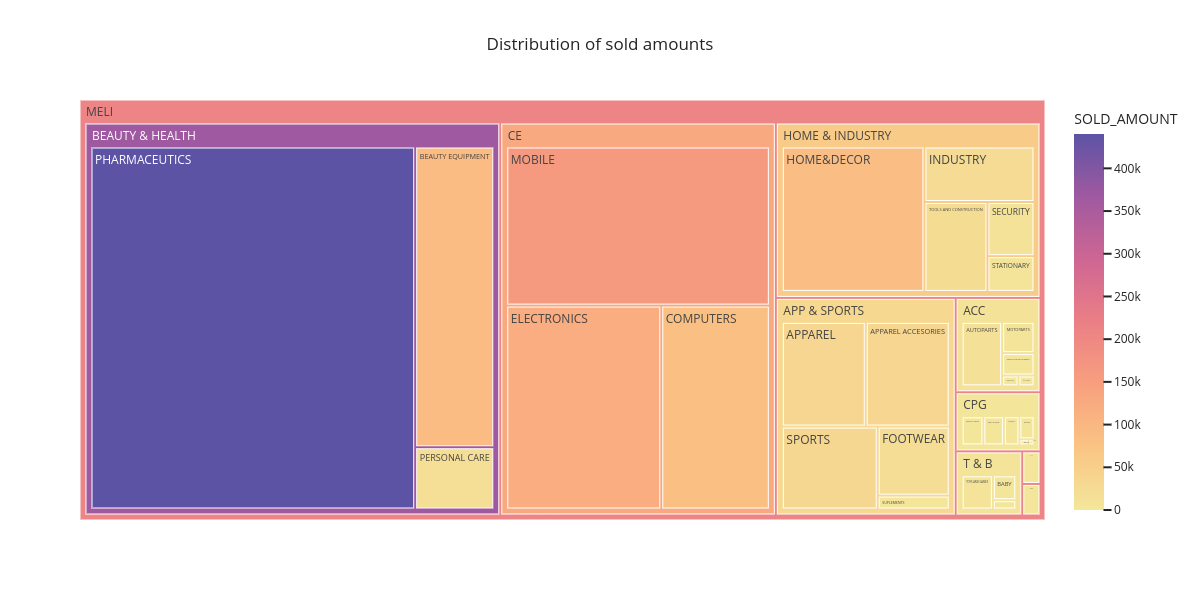

In [ ]:
raw_df.groupby(['VERTICAL'])['SOLD_AMOUNT'].sum().sort_values()

VERTICAL
OTHERS               1929.24
ENTERTAINMENT        1988.57
T & B               14302.78
CPG                 16787.68
ACC                 26819.98
APP & SPORTS       131101.36
HOME & INDUSTRY    155518.68
CE                 362787.94
BEAUTY & HEALTH    547427.27
Name: SOLD_AMOUNT, dtype: float64

4. Como es de esperar, las ofertas consiguen mayor cantidad e ingresos cuanto mayor duración tienen.

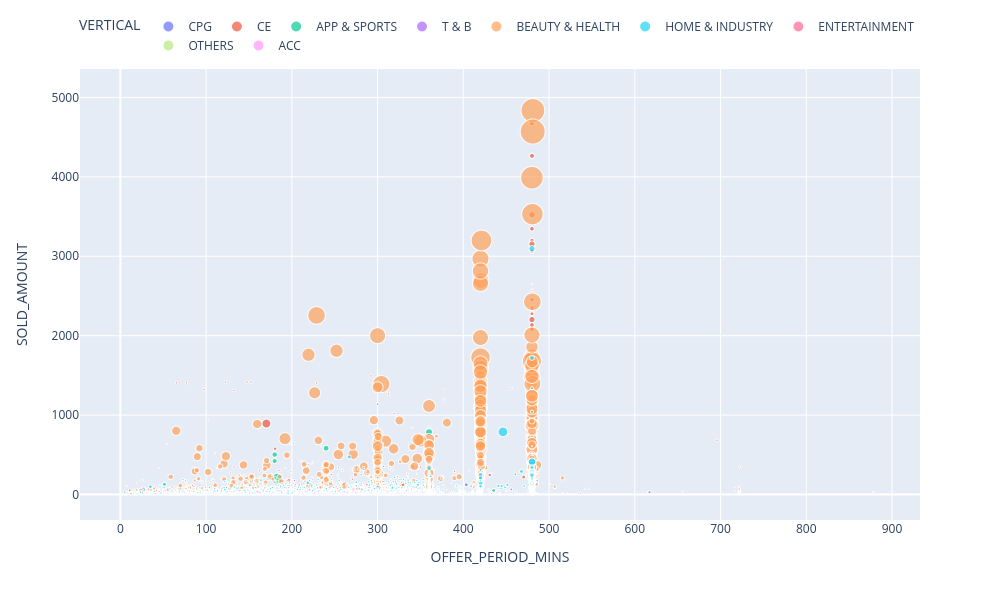

5. Pero lo anterior varía según la vertical. Se observan variaciones importantes según la vertical en: cantidad de ofertas realizadas, cantidad de ventas concretadas, e ingresos de esas ventas. Lo interesante es que eso varía de acuerdo al período que dura la publicación. Pareciendo ser más valioso tener publicaciones de larga duración para electrónica (mayores a  400 minutos), mientras que en belleza parecen suficientes los 300 minutos.

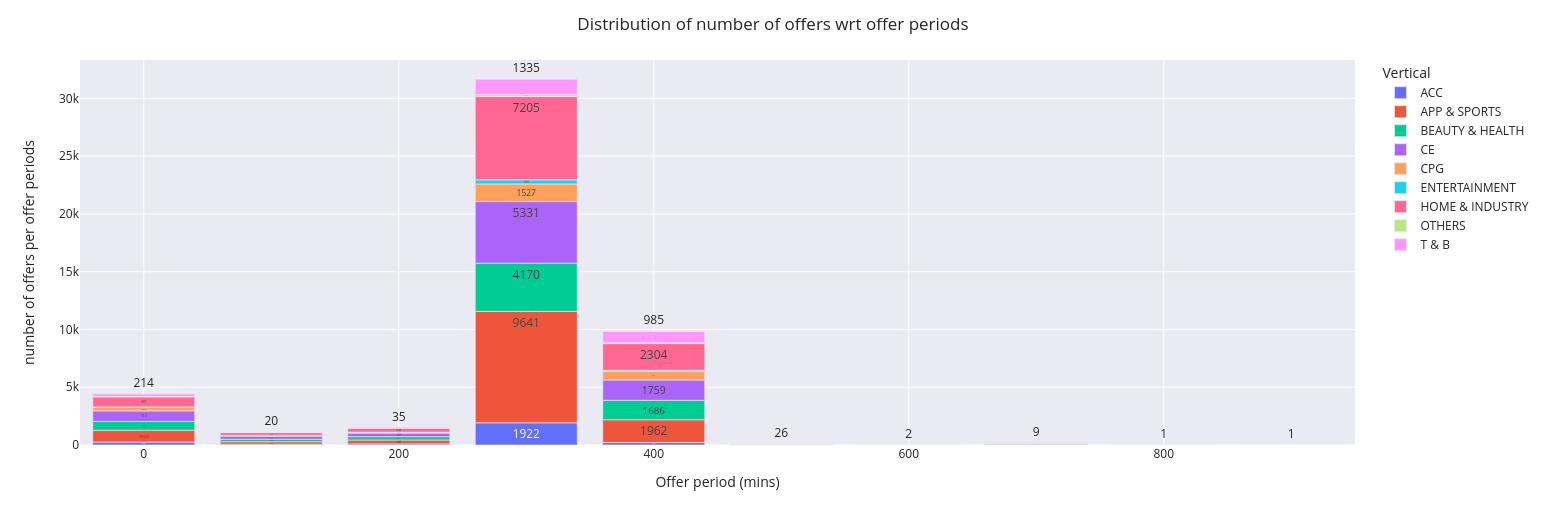



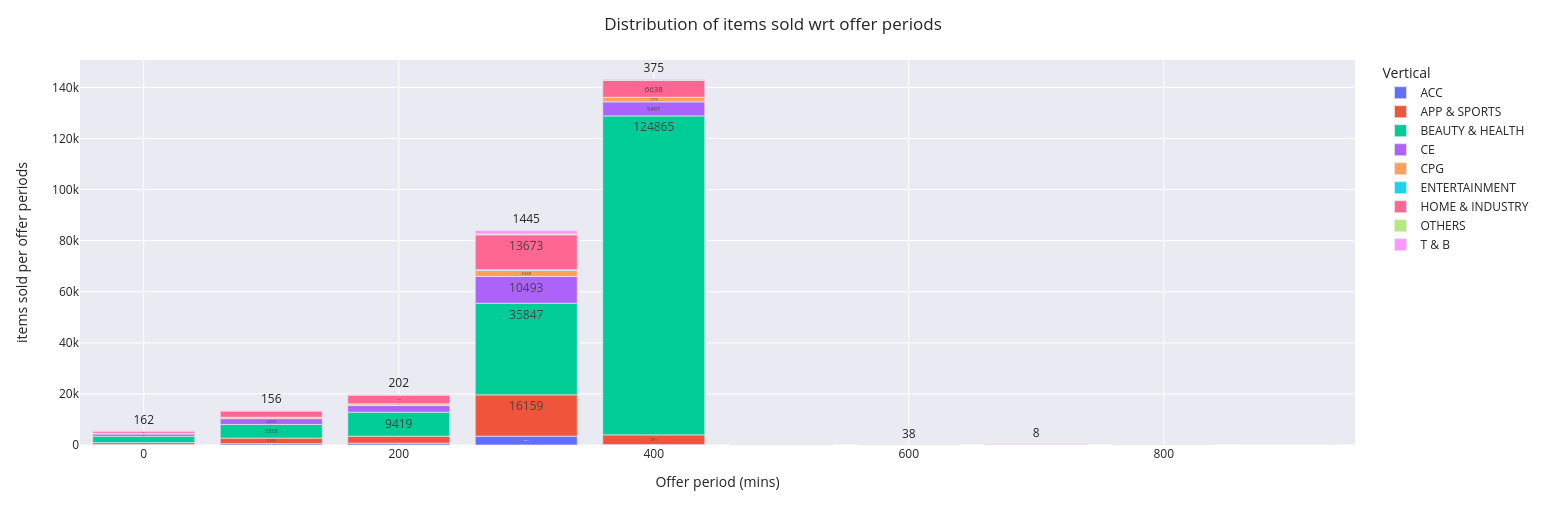

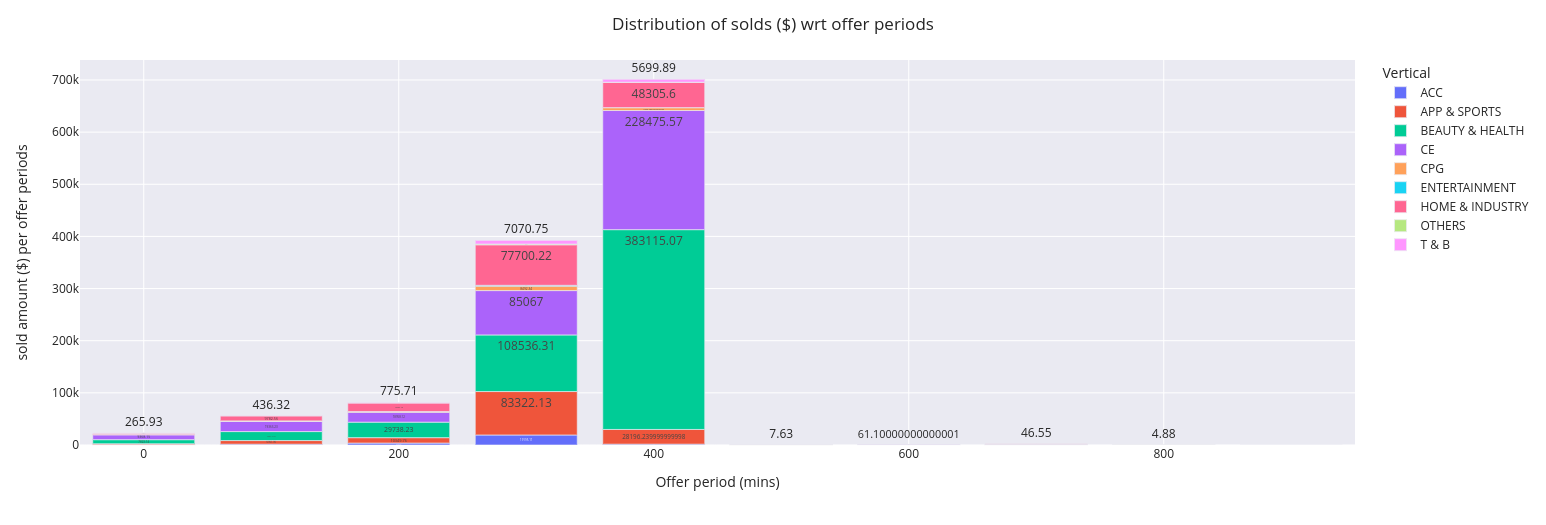


6. Las ventas más exitosas son en belleza, y eso lo consiguen vendiendo mucho volumen. Si observamos los ingresos por campaña considerando el precio, las ofertas de electrónica son las mejores, seguido por algun caso de Home & Industry.

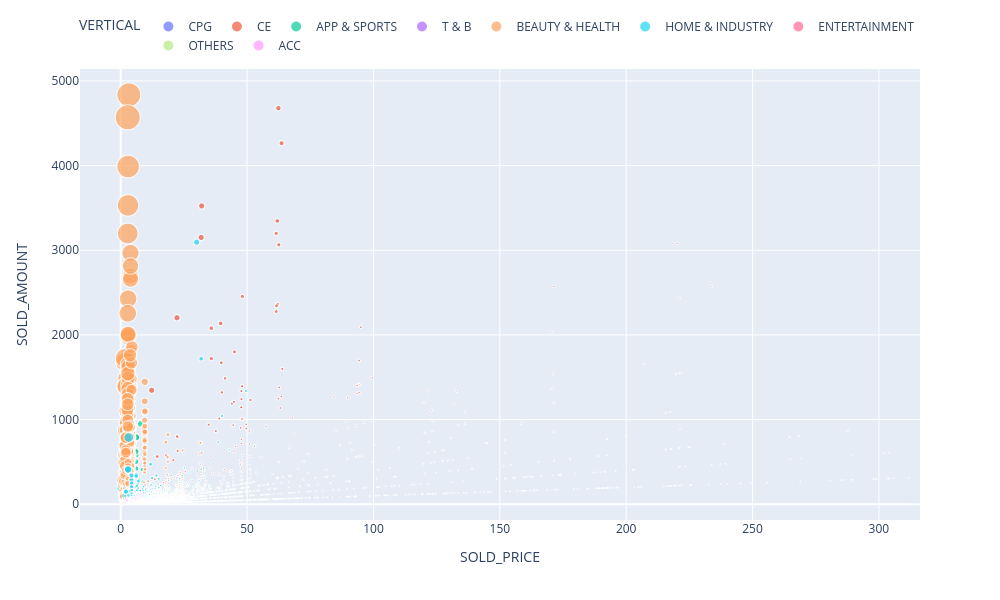

Podría ampliarse el estudio sobre la performance de las ofertas según precio, duración y vertical. Podrían agregarse otros factores al análisis como los costos directos de las ofertas y los retornos por otros servicios asociados (créditos, delivery...).

7. finalmente no se observan tendencias temporales fuertes. Solo se aprecia mayor éxito en las ofertas que suceden enrte los días hábiles del 5 al 20 de cada mes.

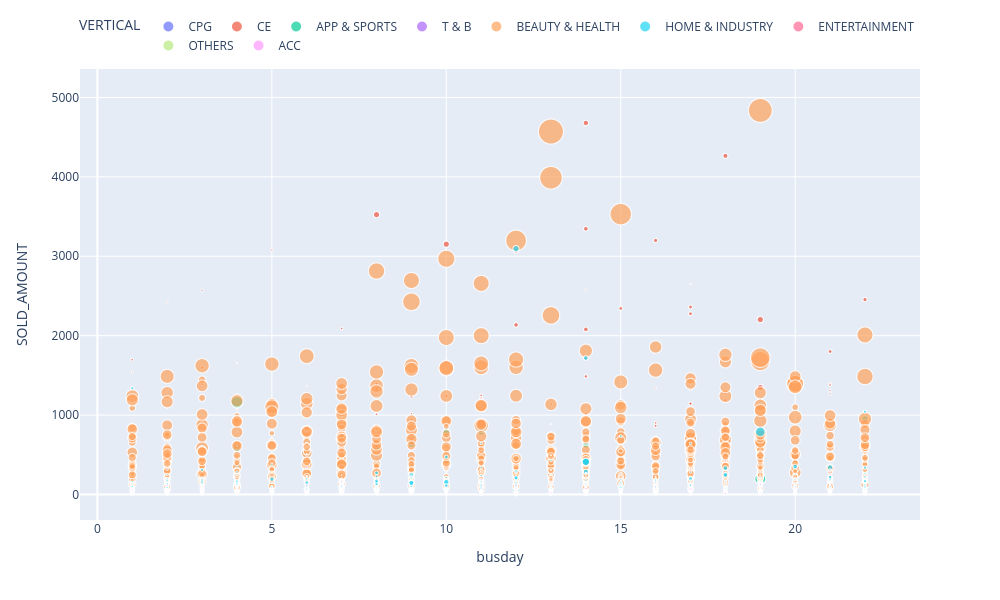

No se observan periodicidad en los días de la semana o en la hora de publicación de la oferta. Quizás más datos son necesarios para observar esto. Solo se obverva una tendencia a publicar las ofertas a las 7, 13 y 19 hrs.

newplot (2).png

Evaluar el éxito de la oferta en base a todo el período en que ella se encueentra abierta, puede ayudar a ver los horarios más exitosos.